### **IMPORTING** **DATA**

In [ ]:
import pandas as pd
train = pd.read_csv('/content/data/train.csv')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv('/content/data/test.csv')
print("Test Set:"% test.columns, test.shape, len(test))

In [ ]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


### **DATA** **CLEANING**

In order to make any machine algorithm work well, I had to pre-process the given text data. 
Tweets contain characters like hashtags or emojis, which won’t be meaningful to a machine learning algorithm.
I am using the re library in Python for removing these characters.
This function also converts every word in lower case, which is nice because the following algorithm will count the frequency of words. Without this processing, a lower and upper version of the same word would count differently, even if the meaning is the same. Let’s have a look at the cleaned data.

In [ ]:
import re
def clean_text(df,text_field):
  df[text_field] = df[text_field].str.lower()
  pattern = r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"
  df[text_field] = df[text_field].apply(lambda elem: re.sub(pattern, "", elem))
  return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [ ]:
train_clean

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso cond...


In [ ]:
test_clean

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...
...,...,...
17192,49155,thought factory leftright polarisation trump u...
17193,49156,feeling like a mermaid hairflip neverready fo...
17194,49157,hillary campaigned today in ohioomg amp used w...
17195,49158,happy at work conference right mindset leads t...


### **HANDLING IMBALANCED DATA**

After having the data cleaned I realized, that the number of non-antisemitic tweets predominated the antisemitic tweets. If the machine learning model is only being fed with tweets, which are labeled as 0, it is more likely, that it will predict new tweets to 0 in the end. Having the classes balanced is an important requirement to proceed in this stage.

It is one approach, to either upsample or downsample the minority/majority of a class. At this point, it was really about trying which method scores better results. I went for upsampling the minority, where samples of the minority are being used multiple times until the class is the same size as the majority. For this implementation, I used the functions of the sklearn library.





In [ ]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority,replace=True,n_samples=len(train_majority),random_state=123)
train_upsampled = pd.concat([train_minority_upsampled , train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

In [ ]:
train_upsampled['label']

19492    1
16151    1
25144    1
30902    1
16522    1
        ..
31956    0
31957    0
31958    0
31959    0
31961    0
Name: label, Length: 59440, dtype: int64

### **CREATING A PIPELINE**

**CountVectoriser**

This function simply does the job of splitting a text into tokens and counting the frequency. 

**TfidTransformer**

This sklearn function called TfidfTransformer applies the frequency weighting to our machine learning model. Without this process of weighting tokens, less frequent words would vanish in the training process later on. The TfidfTransformer assigns less value to more frequent words and allocates more value to less frequent but perhaps more meaningful words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**SGDClassifier**

Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

In [ ]:
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('nb',SGDClassifier())])

**Logistic** **regression**

Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

In [ ]:

from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline([('vect', TfidfVectorizer()),('tfidf',  TfidfTransformer()),('n', LogisticRegression())])

**Decision Tree**

Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline_dt = Pipeline([('vect', TfidfVectorizer()),('tfidf',  TfidfTransformer()),('n', DecisionTreeClassifier())])

**Random Forest**

Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rfc = Pipeline([('vect', TfidfVectorizer()),('tfidf',  TfidfTransformer()),('n', RandomForestClassifier())])

**K-Nearest Neighbours**

Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_kn = Pipeline([('vect', CountVectorizer()),('tfidf',  TfidfTransformer()),('n', KNeighborsClassifier(n_neighbors=3))])

**Support vector machine**

Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In [ ]:
from sklearn.svm import SVC
pipeline_svc = Pipeline([('vect', CountVectorizer()),('tfidf',  TfidfTransformer()),('n', SVC(C=1.0, kernel='linear',random_state=123))])

### **TRAINING** **THE** **MODEL** 

Before training the model, all the given data had to be split into a training and test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_upsampled['tweet'],train_upsampled['label'],random_state=0,test_size=0.2)

**Using** **SGD** **Classifier**

In [ ]:
%%time
model_sgd = pipeline_sgd.fit(X_train,y_train)
y_predict1 = model_sgd.predict(X_test)
from sklearn.metrics import f1_score
score_1 = f1_score(y_test, y_predict1)
print(score_1)

0.9707651186100903
CPU times: user 1.16 s, sys: 115 ms, total: 1.28 s
Wall time: 1.19 s


**Using Logistic regression**

In [ ]:
%%time
model_lr = pipeline_lr.fit(X_train,y_train)
y_predict2 = model_lr.predict(X_test)
from sklearn.metrics import f1_score
score_2 = f1_score(y_test, y_predict2)
print(score_2)

0.9814861355449442
CPU times: user 1.66 s, sys: 1.01 s, total: 2.66 s
Wall time: 1.85 s


**Using Decision Tree**

In [ ]:
%%time
model_dt = pipeline_dt.fit(X_train,y_train)
y_predict3 = model_dt.predict(X_test)
from sklearn.metrics import f1_score
score_3 = f1_score(y_test, y_predict3)
print(score_3)

0.9530832185398267
CPU times: user 10.8 s, sys: 3.2 ms, total: 10.8 s
Wall time: 10.8 s


**Using Random Forest**

In [ ]:
%%time
model_rfc = pipeline_rfc.fit(X_train,y_train)
y_predict4 = model_rfc.predict(X_test)
from sklearn.metrics import f1_score
score_4 = f1_score(y_test, y_predict4)
print(score_4)

0.9986415350653761
CPU times: user 43.8 s, sys: 53.4 ms, total: 43.9 s
Wall time: 44 s


**Using K-Nearest Neighbours**

In [ ]:
%%time
model_kn = pipeline_kn.fit(X_train,y_train)
y_predict5 = model_kn.predict(X_test)
from sklearn.metrics import f1_score
score_5 = f1_score(y_test, y_predict5)
print(score_5)

0.9987263309841217
CPU times: user 11.6 s, sys: 412 ms, total: 12 s
Wall time: 12.1 s


**Using Support vector machine**

In [ ]:
%%time
model_svc = pipeline_svc.fit(X_train,y_train)
y_predict6 = model_svc.predict(X_test)
from sklearn.metrics import f1_score
score_6 = f1_score(y_test, y_predict6)
print(score_6)

0.987290632101675
CPU times: user 7min 30s, sys: 304 ms, total: 7min 30s
Wall time: 7min 32s


### **PLOTTING DIFFERENT MODEL VS THEIR ACCURACY**

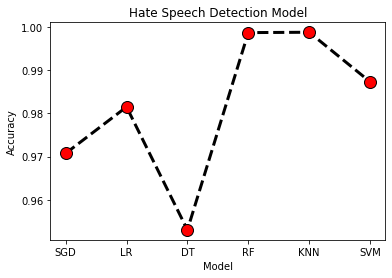

In [ ]:
import matplotlib.pyplot as plt
# x axis values 
x = ['SGD','LR','DT','RF','KNN','SVM']
# corresponding y axis values 
y = [score_1,score_2,score_3,score_4,score_5,score_6] 
# plotting a graph 
plt.plot(x, y, color='black', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12,) 
# naming the x-axis 
plt.xlabel('Model') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Hate Speech Detection Model') 
# function to show the plot 
plt.show() 


### **RESULT**

In [ ]:
best = max(score_1, score_2, score_3, score_4, score_5, score_6) 
for i in y:
  if i == best:
    z= y.index(i)
    break
print("The best model, we can use here is: ",x[z])
print("It's accuracy is : ", i)



The best model, we can use here is:  KNN
It's accuracy is :  0.9987263309841217
